# Assignment 1 - CS110

## Task 1

(#sort) Implement three-way merge sort in Python. It should at a minimum accept lists of integers as input.

In [1]:
def merge(arr0, arr1, arr2):
    mrg_arr = []
    ptrs = [0, 0, 0] # pointers for each array to check which elems we're comparing
    
    # adding infinitely large number to the end to fill merged arr with elems from other lists when one is completed
    inf_num = float('inf')
    arr0.append(inf_num) 
    arr1.append(inf_num)
    arr2.append(inf_num)
    
    # while at least one pointer does not point to the end (we have not finished checking at least 1 array)
    while [arr0[ptrs[0]], arr1[ptrs[1]], arr2[ptrs[2]]] != [inf_num, inf_num, inf_num]:
        
        # if pointer not at the end, and the current element is the minimum
        if inf_num > arr0[ptrs[0]] <= min(arr1[ptrs[1]], arr2[ptrs[2]]):
            mrg_arr.append(arr0[ptrs[0]]) # add it to the merged array
            ptrs[0] += 1 # move the pointer on this array
            
        if inf_num > arr1[ptrs[1]] <= min(arr0[ptrs[0]], arr2[ptrs[2]]):
            mrg_arr.append(arr1[ptrs[1]])
            ptrs[1] += 1
            
        if inf_num > arr2[ptrs[2]] <= min(arr0[ptrs[0]], arr1[ptrs[1]]):
            mrg_arr.append(arr2[ptrs[2]])
            ptrs[2] += 1
    
    return mrg_arr
    
    
def merge_sort(arr):
    # one member array is already sorted
    if len(arr) == 1:
        return arr 
    
    # since we cannot three-way divide a 2-elem array, we will "hand-sort" it
    if len(arr) == 2:
        if arr[0] > arr[1]:
            arr[0], arr[1] = arr[1], arr[0]
        return arr
    
    left_mid = len(arr) // 3
    # split the excess evenly b/w mid & right partitions
    right_mid = len(arr) // 3 * 2 + (len(arr) % 3) // 2 
    
    left_part = merge_sort(arr[:left_mid]) # recursively divide partitions into smaller partitions
    mid_part = merge_sort(arr[left_mid:right_mid])
    right_part = merge_sort(arr[right_mid:])
    
    return merge(left_part, mid_part, right_part)    

In [2]:
from random import randint

# defining sizes for types of arrays we will test on to
# compare merge + insertion sort with pure merge sort and regular merge sort with
# 3-way mergesort on bigger size of arrays
TOY_ARR = {"size": 20, "min_len": 100, "max_len": 120}
REAL_ARR = {"size": 5, "min_len": 1e4, "max_len": 5e4}
HUGE_ARR = {"size": 1, "min_len": 1e5, "max_len": 1e5+1}

list_of_lists = []

# for each type, we are creating specified number of arrays of each type of specified lengths
for ARR in [TOY_ARR, REAL_ARR, HUGE_ARR]:
    for i in range(ARR["size"]):
        list_of_lists.append([ 0 for j in range(randint(ARR["min_len"], ARR["max_len"]))])
    
# filling in arrays with some random numbers
for i in range(len(list_of_lists)):
    for j in range(len(list_of_lists[i])):
        list_of_lists[i][j] = randint(-10, 10)

In [3]:
print("Original list:", list_of_lists[0])
print("Sorted list:", merge_sort(list_of_lists[0]))

Original list: [6, 2, -3, -10, -7, 3, -6, 10, 5, 2, -9, -3, -3, 3, -9, -3, -9, -8, 8, 4, 6, 4, -1, -7, -6, -6, 8, -6, -4, -7, 10, -1, -3, 3, 3, 2, 7, 3, 0, 0, -10, 5, -3, 7, 7, 3, -1, 7, 9, -2, -10, -2, 7, -8, -2, -6, -6, 8, -9, -6, 9, 7, 8, 3, -5, 8, 4, 5, 5, 10, -7, -7, 5, 2, 7, -7, -2, 7, -9, -3, -7, 9, -5, -3, -2, 5, -3, 6, 6, -3, 1, 0, 1, -6, 4, -2, 3, -4, 4, -1, -10, 10, -9, -8, 5, 4, -10, 7, -7, -6, 2, 6, -2, -2, 1, 5]
Sorted list: [-10, -10, -10, -10, -10, -9, -9, -9, -9, -9, -9, -8, -8, -8, -7, -7, -7, -7, -7, -7, -7, -7, -6, -6, -6, -6, -6, -6, -6, -6, -6, -5, -5, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10]


## Task 2

(#sort) Implement a second version of three-way merge sort that calls insertion sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process.

In [4]:
def insertion_sort(arr_orig):
    arr = arr_orig[:] # deep-copying
    for i in range(len(arr) - 1):
        j = i + 1
        while arr[j] < arr[j - 1] and j >= 1:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
    return arr

def aug_merge_sort(arr):
    # choosing to ins-sort at 17 because it is a small enough number
    # and 17 mod 3 = 2 => we will have very uneven subarrays
    if len(arr) < 17:
        return insertion_sort(arr)
    
    left_mid = len(arr) // 3
    # split the excess evenly b/w mid & right partitions
    right_mid = len(arr) // 3 * 2 + (len(arr) % 3) // 2 
    
    left_part = aug_merge_sort(arr[:left_mid])
    mid_part = aug_merge_sort(arr[left_mid:right_mid])
    right_part = aug_merge_sort(arr[right_mid:])
    
    return merge(left_part, mid_part, right_part) 

In [5]:
print("Original list:", list_of_lists[1])
print("Sorted list:", aug_merge_sort(list_of_lists[1]))

Original list: [10, 2, 0, 5, -6, 3, 6, -6, -7, -9, -10, 5, -3, 3, 7, -3, -6, 7, 0, 0, -2, 1, 2, -7, -1, 7, 9, 0, 4, 9, 4, 7, 0, 4, -3, -10, 1, -4, -8, 9, -4, 9, -1, 6, 10, 4, -4, -1, -8, -8, 3, -7, -1, -6, 1, -4, 7, -9, -2, 1, -9, 10, 10, -2, 9, 6, 9, 10, -2, 8, -9, -9, 9, -8, -1, 1, 1, 7, -2, 1, -9, 6, -1, -5, 10, -4, -2, 7, -10, 5, -10, 0, 8, -10, -2, 1, -1, 0, 8, 9, -2, -10, -10, 6, 0, -3, 10, 8, -3, 1]
Sorted list: [-10, -10, -10, -10, -10, -10, -10, -9, -9, -9, -9, -9, -9, -8, -8, -8, -8, -7, -7, -7, -6, -6, -6, -6, -5, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10]


## Task 3

(#sort, #optimalalgorithm) Implement k-way merge sort, where the user specifies k.

In [6]:
def k_way_merge(parts):
    k = len(parts)
    mrg_arr = [] # array to which we will put sorted elems
    ptrs = [0] * k # initializing list of pointers for each array
    
    # while at least one pointer does not point to the end (we have not finished checking at least 1 array)
    while any([ptrs[i] < len(parts[i]) for i in range(k)]):
        vals_to_cmp = [] # to store existing values that pointers point at
        for i in range(k):
            if ptrs[i] < len(parts[i]): # if pointer is still in arr
                vals_to_cmp.append(parts[i][ptrs[i]])
        tmp = min(vals_to_cmp) # filter to check which elements to put in array
                                      
        for i in range(k):
            # check if elem exists and it is equal to the filter
            if ptrs[i] < len(parts[i]) and tmp == parts[i][ptrs[i]]:
                mrg_arr.append(parts[i][ptrs[i]]) # adding value at that pointer to the merge array
                ptrs[i] += 1 # move pointer for that arr
        
    return mrg_arr

def k_way_merge_sort(arr, k=2):
    # if arr length is smaller than k, we cannot divide further
    if len(arr) < max(k, 9): # 9 comes from the analysis below
        return insertion_sort(arr)
    
    sep = [0] * (k + 1) # initializing array that stores seperators b/w partitions
    excess = len(arr) % k # check how many arrays of len(arr) // k + 1 we need
    for i in range(1, k):
        sep[i] = sep[i-1] + (len(arr) // k)
        if i >= k - excess:
            sep[i] += 1
    sep[k] = len(arr) # adding the position after last elem to include it in the last arr slice
            
    parts = []
    for i in range(k):
        parts.append(k_way_merge_sort(arr[sep[i] : sep[i + 1]])) # recursively divide partitions further
        
    return k_way_merge(parts)

In [7]:
print("Original list:", list_of_lists[3])
print("Sorted list:", k_way_merge_sort(list_of_lists[3], k=4))

Original list: [-7, 9, 6, 5, -3, -4, 0, -5, 2, 6, -4, -3, 8, -9, -5, -9, -6, 5, -10, 5, 6, -7, 5, -4, -1, -2, 0, -8, -3, 2, -3, 7, -4, -7, -5, 8, -4, 7, -9, 8, 9, 10, 4, -3, -8, -1, -6, -1, -8, 8, -1, -1, -3, 7, -1, 1, 10, 6, 5, -9, -7, -9, -1, 4, -7, 6, -1, 1, 6, -3, -4, -2, 3, 6, -7, 5, 2, -5, 8, -7, 1, 5, -4, -7, -7, -6, -5, -2, -8, -3, -3, -6, 10, 0, -2, 8, 7, 2, 0, 9, 10, -1, 8, -2, 7, -9, 3, -2, 0]
Sorted list: [-10, -9, -9, -9, -9, -9, -9, -8, -8, -8, -8, -7, -7, -7, -7, -7, -7, -7, -7, -7, -6, -6, -6, -6, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10]


## Performance measurement

Develop and run experiments to support a hypothesis about the “best” value of k.

In [37]:
import time
from sys import stdout

k_to_test = 10
runtimes = []

for arr in [list_of_lists[:TOY_ARR["size"]],
            list_of_lists[TOY_ARR["size"]:TOY_ARR["size"] + REAL_ARR["size"]],
            list_of_lists[TOY_ARR["size"] + REAL_ARR["size"]:]
           ]:
    for k in range(1, k_to_test + 1):
        avg_runtime = 0

        for i in range(len(arr)):
            start = time.time()
            k_way_merge_sort(arr[i], k=k)
            end = time.time()
            avg_runtime += end - start

            stdout.write("\rProgress: evaluated k = {0} out of {1}, sorted list i = {2} out of {3} ".format(k, k_to_test, i, len(arr)))

        avg_runtime /= len(arr)
        runtimes.append(avg_runtime * 1000)

Progress: evaluated k = 10 out of 10, sorted list i = 0 out of 1 

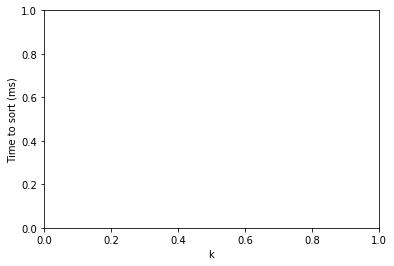

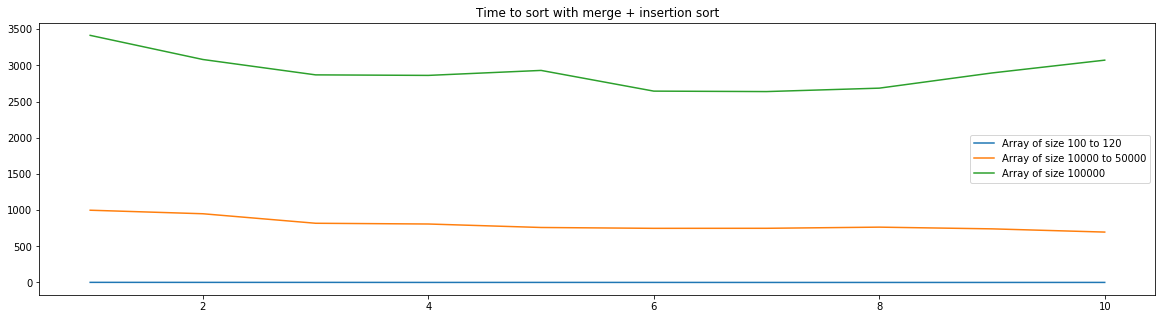

In [46]:
from matplotlib import pyplot as plt
import numpy as np

plt.xlabel('k')
plt.ylabel('Time to sort (ms)')

plt.subplots(figsize=(20, 5))
plt.title('Time to sort with merge + insertion sort')
plt.xticks(np.arange(0, 41, 2))
toy_line, = plt.plot(range(1, k_to_test + 1), runtimes[:k_to_test], label="Array of size {0} to {1}".format(TOY_ARR["min_len"], TOY_ARR["max_len"]))
real_line, = plt.plot(range(1, k_to_test + 1), runtimes[k_to_test:2 * k_to_test], label="Array of size {0} to {1}".format(int(REAL_ARR["min_len"]), int(REAL_ARR["max_len"])))
huge_line, = plt.plot(range(1, k_to_test + 1), runtimes[2 * k_to_test:], label="Array of size {0}".format(int(HUGE_ARR["min_len"])))

plt.legend(handles=[toy_line, real_line, huge_line])

plt.show()

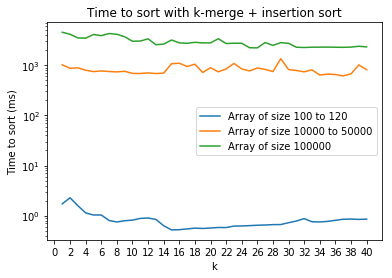

In [24]:
plt.yscale('log')

plt.xlabel('k')
plt.ylabel('Time to sort (ms)')

plt.title('Time to sort with k-merge + insertion sort')
plt.xticks(np.arange(0, 41, 2))
toy_line, = plt.plot(range(1, k_to_test + 1), runtimes[:k_to_test], label="Array of size {0} to {1}".format(TOY_ARR["min_len"], TOY_ARR["max_len"]))
real_line, = plt.plot(range(1, k_to_test + 1), runtimes[k_to_test:2 * k_to_test], label="Array of size {0} to {1}".format(int(REAL_ARR["min_len"]), int(REAL_ARR["max_len"])))
huge_line, = plt.plot(range(1, k_to_test + 1), runtimes[2 * k_to_test:], label="Array of size {0}".format(int(HUGE_ARR["min_len"])))

plt.legend(handles=[toy_line, real_line, huge_line])
plt.show()

## Performance analysis

We can notice overall, the more elements are in the array, the longer it takes to sort them. We can also notice that with increasing k, the sorting time decreases for the "huge" array, but it seems to just fluctuate around the value for "real" and "toy" arrays. Most likely, the reason for huge arrays performing better on bigger k's is that the way I implemented the divide part of the algorithm involves switching to insertion sort when the length of the array is smaller than k. Then, the bigger k is, within a certain range, the faster the algorithm will switch to insertion sort, which performs better than mergesort due to different duration of processing steps in the processor. For smaller arrays, it does not matter that much because the number of memory allocations is not significant in smaller k's to make the algorithm with smaller k run noticeably slower. Moreover, we still switch to insertion sort at length = 9 at least, so there should be even less difference.

## Task 4

(#complexity, #optimalalgorithm) Analyze and compare the practical run times of regular merge sort, three-way merge sort, and the augmented merge sort from (2). Make sure to define what each algorithm's complexity is and to enumerate the explicit assumptions made to assess each algorithm's run time. Your results should be presented in a table, along with an explanatory paragraph and any useful graphs or other charts to document your approach. Part of your analysis should indicate whether or not there is a “best” variation. Compare your benchmarks with the theoretical result we have discussed in class.

In [25]:
def merge_seqs(lhs, rhs):
    merged_arr = []
    l_i = 0 
    r_i = 0
    
    while l_i < len(lhs) and r_i < len(rhs):
        if lhs[l_i] <= rhs[r_i]:
            merged_arr.append(lhs[l_i])
            l_i += 1
        else:
            merged_arr.append(rhs[r_i])
            r_i += 1
    
    if l_i == len(lhs):
        while r_i < len(rhs):
            merged_arr.append(rhs[r_i])
            r_i += 1
            
    if r_i == len(rhs):
        while l_i < len(lhs):
            merged_arr.append(lhs[l_i])
            l_i += 1
    
    return merged_arr

def reg_merge_sort(arr):
    if len(arr) == 1:
        return arr
    
    center = len(arr) // 2
    lhs = reg_merge_sort(arr[:center])
    rhs = reg_merge_sort(arr[center:])
    
    merged_arr = merge_seqs(lhs, rhs)
    
    return merged_arr

In [26]:
print(merge_sort(list_of_lists[10]))

[-10, -10, -10, -10, -10, -10, -10, -10, -9, -9, -8, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -6, -6, -5, -5, -5, -5, -5, -5, -4, -4, -4, -3, -3, -3, -3, -2, -2, -2, -2, -2, -1, -1, -1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10]


## Complexity analysis

I will write down complete complexity analysis of three-way merge sort. Analysis for others will yield the same compleity but just different number of steps.<br/>

Let's start with writing out the recurrence for this algorithm: $$ T(n) = 3 * T(\frac{n}{3}) + O(n) $$<br/> Here we divide an array to 3 subproblems and would like to add up the run time of all 3 subproblems, therefore, we're mupltiply $ T(\frac{n}{3}) $ by 3. On the other hand, we need O(n) operations at each step because we have $ 3^i $ subproblems at layers i, each of size $ \dfrac{n}{3^i} $ => total operations to merge subarrays into parent arrays of total length n is $ c_1(3^i * \dfrac{n}{3^i}) + c_2 = c_1n + c_2 = O(n) $. where $ c_1, c_2 $ are constants that define the number of operations during merging (e.g. check current elems of each array and comparing them) **and** before merging (e.g. initializing a place in memory to store ordered elems).<br/>

Now, we would like to find the number of such merges we're performing (or the height of the tree including the root). To do so, let's notice that at layer i, the size of a subarray is $ \dfrac{n}{3^i} $. Let's write this out for the last layer where length of a subarray equals to 1: $$ \dfrac{n}{3^i} = 1 => 3^i = n => i = log_3 n $$<br/> Since this assumes that i > 0 because n > 3, then to include the root, we have to add one to this. Total height of the tree = $ log_3 n + 1 $

Combining with the results we get in the beginning, the total number of operations we perform is $$ (c_1n + c_2)(log_3 n + 1) = c_1 n log_3 n + c_2 log_3 n + c_1 n + c_2 = \Theta(n*logn) $$

To explain how we came to the theta notation, let's be formal and use the definition. There exists $c_a, c_b$ so that for all $n > n_0$ where n_0 is some positive number, this inequality is true: $$ c_a n logn \leq c_1 n log_3 n + c_2 log_3 n + c_1 n + c_2 \leq c_b n log_3 n $$

$$ c_a \leq c_1 + \frac{c_2}{n} + \frac{c_1}{log_3 n} - \frac{c_2}{n log_3 n} \leq c_b \space (1) $$

$$ c_1 \leq c_1 + \frac{c_2}{n} + \frac{c_1}{log_3 n} - \frac{c_2}{n log_3 n} \leq 2c_1 + c_2 \space (2)$$

In (1) we divide all sides by $ nlog_3n $ and assume that $ nlogn = nlog_3n $. In (2), we fix $ c_a, c_b $ and then pick $ n_0 $ for which these conditions work. As we can observe that for $ n \geq n_0 = 3 $, the double inequality always works. Therefore, we have picked constant scalings of the function O(logn) that can "sandwich" our function.

## Practical performance comparison

In [27]:
import numpy as np

runtimes = np.zeros((3, 3))
for idx_algo, sort_algo in enumerate([merge_sort, reg_merge_sort, aug_merge_sort]):
    for idx_arr, arr in enumerate([list_of_lists[:TOY_ARR["size"]],
                                   list_of_lists[TOY_ARR["size"]:TOY_ARR["size"] + REAL_ARR["size"]],
                                   list_of_lists[TOY_ARR["size"] + REAL_ARR["size"]:]
                                  ]):
        for i in range(len(arr)):
            start = time.time()
            sort_algo(arr[i])
            end = time.time()
            avg_runtime += end - start

            stdout.write("\rProgress: testing algorithm {0} out of 3 sorted list i = {1} out of {2} ".format(idx_algo, i, len(arr)))

        avg_runtime /= len(arr)
        runtimes[idx_algo][idx_arr] = avg_runtime * 1000

Progress: testing algorithm 2 out of 3 sorted list i = 0 out of 1 

In [29]:
import pandas as pd

df = pd.DataFrame({
    "Algorithm": ["3-way mergesort", "Regular mergesort", "Augmented mergesort"],
    "Toy arrays": runtimes[:, 0],
    "Real arrays": runtimes[:, 1],
    "Huge array": runtimes[:, 2]
})
df

,Algorithm,Toy arrays,Real arrays,Huge array
0,3-way mergesort,116.921902,333.100367,1373.079348
1,Regular mergesort,69.097247,258.687633,1103.490727
2,Augmented mergesort,55.541439,256.020912,1126.927980


As we can observe, the fastest to sort on toy arrays is the augmented mergesort. This is because for small n, number of steps for insertion sort $ 3n^2 + n \space (0) $ is less than $ 6nlog_2n + 6n \space (1) $ of the regular mergesort or $ 8nlog_3n + 8n \space (2) $ of the 3-way mergesort (e.g. when n < 9). However, we must also consider that for mergesort we need to allocate memory for the merging array, which takes usually more time than in-place swapping in practice.

(0) For loop is n op., while condition, swap, pointer shift is 3n op. => total $ 3n*n = 3n^2 $. Approximate number of steps for (1) is already stated in Cormen et al., so it's not interesting to rewrite so let's prove (2). As we found out before, the tree height + root = $ log_3n + 1 $. Apart from this let's find the number of operations of each merge:
1. A loop that repeats at least n times because at each level we're filling in at least one element in all subarrays
2. Inside this loop, we're doing $ 8n $ operations (3 comparisons in while loop, 2 comp. in if, 1 min, append, pointer shift) - everything nested in **while** loop => $ (3 + 2 + 1 + 1 + 1)*n = 8n $

Then, total number of operations is tree height * number of operations at each tree level = $ (log_3n + 1)8n = 8nlog_3n + 8n $

Another observation is that for "real" arrays, 3-way mergesort is slower compared to regular mergesort, whereas it's the opposite case on toy arrays. Looking at the number of steps, we can see that $ 6nlog_2n + 6n < 8nlog_3n + 8n => 6nlog_2n < 8nlog_3n + 2n => 6log_2n < 8log_3n + 2 => n ∈ ∅ $. 

This might happen because in 3-way mergesort I sort by hand when there are only 3 elems, running only 3 steps instead of 6. For small arrays, this time saving affects quite drstically when array size is small, and the tree height is small enough.

In contrast, for bigger n (in real arrays or huge array), 3-way mergesort performs the worst because of the coefficients in the number of steps. Augmented is slightly better because it turns into insertion sort at some point, but still worse than 2-way mergesort because of the number of steps of 3-way which is involved at layers with bigger length is bigger than that of 2-way.

## Conclusions

As shown in the experiment, augmented mergesort works very well on smaller arrays because of insertion sort kicking in at n small enough (specifically, n = 8), so that $ 3n^2 < 6nlog_2n + 6n $ (for $ n \geq 8 => 3*64 = 192 >= 6*8*3 + 6*8 = 192  $). Thus, the best solution would be to do 2-way mergesort as it has least number of steps for big enough n and call insertion sort when n < 8. Let's "test" this hypothesis by comparing this algorithm to the previous three!

In [30]:
def aug_merge_sort_2(arr):
    if len(arr) < 9:
        return insertion_sort(arr)
    
    center = len(arr) // 2
    lhs = aug_merge_sort_2(arr[:center])
    rhs = aug_merge_sort_2(arr[center:])
    
    merged_arr = merge_seqs(lhs, rhs)
    
    return merged_arr

In [32]:
new_runtimes = np.zeros((1, 3))

for idx_arr, arr in enumerate([list_of_lists[:TOY_ARR["size"]],
                               list_of_lists[TOY_ARR["size"]:TOY_ARR["size"] + REAL_ARR["size"]],
                               list_of_lists[TOY_ARR["size"] + REAL_ARR["size"]:]
                              ]):
    for i in range(len(arr)):
        start = time.time()
        aug_merge_sort_2(arr[i])
        end = time.time()
        avg_runtime += end - start

        stdout.write("\rProgress: testing algorithm {0} out of 1 sorted list i = {1} out of {2} ".format(1, i, len(arr)))

    avg_runtime /= len(arr)
    new_runtimes[0][idx_arr] = avg_runtime * 1000
    
all_runtimes = np.vstack((new_runtimes, runtimes))
    
df = pd.DataFrame({
    "Algorithm": ["2-way, augmented", "3-way mergesort", "Regular mergesort", "Augmented mergesort"],
    "Toy arrays": all_runtimes[:, 0],
    "Real arrays": all_runtimes[:, 1],
    "Huge array": all_runtimes[:, 2]
})

df

Progress: testing algorithm 1 out of 1 sorted list i = 0 out of 1 

,Algorithm,Toy arrays,Real arrays,Huge array
0,"2-way, augmented",48.426690,205.163682,902.962888
1,3-way mergesort,116.921902,333.100367,1373.079348
2,Regular mergesort,69.097247,258.687633,1103.490727
3,Augmented mergesort,55.541439,256.020912,1126.927980


### YAY!

## Appendix

$ \frac{1}{2} $ ***#induction*** and $ \frac{1}{2} $ ***#deduction***: In task 4, I used deduction (by calculating number of steps for algorithms = premises) to make an argument why on arrays of substantial size, the sorting speeds differ. I used induction to explain why original 2-way mergesorting is slower than 3-way for smaller sizes, even if the number of steps present the opposite.<br/>
***#plausibility***: I proposed a hypothesis on why bigger arrays tend to be sorted faster with bigger k's within some range. I explained why even though by the number of steps, ins. sort is better only for lengths less than 9, but in real life performace, it actually performs better than mergesort up to until about 43 elements.<br/>
***#algorithms***: I used algorithmic thinking to apply divide-and-conquer paradigm to k-way sorting. I made sure that merge operation is still $ \Theta(n) $ and overall complexity is $ \Theta(nlogn) $. <br/>
***#dataviz***: I created easy-readable graphs with named axes and appropriate axes ticks to compare the performance depending on k and array sizes. I also used a logarithmic scale to make the toy array line's features distinguishable.<br/>
***#presentation***: I used LaTeX formatting to make my complexity calculations and other explanations readable and less error-prone. I added elaborate comments to explain lines where the code might be "hard to digest" or is a shortened word.